# Datatiedeoprojektin pohja

Tämä työkirja toimii pohjana tuleville datatiedeprojekteille

In [ ]:
# Ensin otetaan tarvittavat kirjastot käyttöön
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import plotly.express as px
import plotly.graph_objs as go


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

from plotly.subplots import make_subplots
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

Täältä löytyy ohjeita pandas kirjaston käyttöön: https://pandas.pydata.org/

Täältä löytyy lisätietoa ja neuvoa seaborn kirjaston käyttöön: https://seaborn.pydata.org/

## Ympäristöt

Datatiedeprojektien tekniseen toteuttamiseen on olemassa monia eri ympäristöjä mitä voi hyödyntää. Itse valitsin anacondan, joka vaati sen lataamisen tietokoneen kovalevylle. Jupyter työkirjat toimivat siellä varsin hyvin muutamia poikkeuksia lukuunottamatta. Tällainen poikkeus havaittiin eräässä demotilaisuudessa, jossa oli tarkoitus käsitellä luonnollista kieltä (NLP). Haasteeksi osoittautui C++- kääntäjän puuttuminen ja siitä syystä koodi ei heti toiminutkaan. Tämän kokemuksen perusteella mielipiteeni muuttui. Google collabilla ei vastaavaa ongelmaa ollut ja tulinkin siihen lopputulokseen, että se lienee työkaluista itselle mieluisin. Opin myös sen, että Google collabilla voi saada käyttöön GPU-laskentatehoa eli grafiikkaprosessoria. Tämä on syytä muistaa sitten, kun toteutan raskaampia datatiedeprojekteja kuten neuroverkkoja. Normaaliin pieneen puuhasteluun anaconda toimii ylensä varsin hyvin. 

Erilaisia ympäristöjä ovat Anaconda, Visual Studio Code, CSC Notebooks, JupyterLab ja Google Colab. Näistä itselleni tuttuja ovat Visual Studio Code, Anaconda ja Google Colab. Tämän hetkisten kokem ustne mukaan Google Colab on näistä itselle sopivin. Oman kokemuksen mukaan Google Colab sopii varsin hyvin esimerkiksi NLP-projekteihin. Tästä syystä vaihdoinkin projektin loppupuolella Google Colabiin, jotta sain tekstinkäsittelyn toimimaan. Haasteita Anacondalla tuotti nltk-kirjaston hyödyntäminen.

## Datan hakeminen

Dataa voidaan hakea monesta paikasta. Ylensä sitä haetaan joko ohjelmistorajapinnasta eli API:sta tai nettisivuilta. Myös raapijan toteuttaminen on mahdollista ja sen avulla voidaankin raapia dataa miltä vain nettisivulta. Datan hakemiseen sellainen huomio, että on ylensä järkevää hakea datasetti vain kerran sinne missä sitä analysoidaan, eikä hakea sitä automaattisesti. Sillä jos dataa haetaan automaattisesti, niin joka kerta kun työkirjan ajaa se lähettää pyynnön nettisivulle, joka palauttaa datasetin. Tämä voi kuormittaa kyseisen datalähteen ylläpitoa ja huonossa tapuksessa IP-osoitteesi saatetaan estää. Tästä huolimatta alla on toteutettu datan hakeminen koneellisesti, sillä tämä työkirja on vain paljon helpompi tarkastaa kun ei tarvitse manuaalisesti hakea dataa. 

In [ ]:
# Osoite josta data haetaan
url = 'http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-03-09/data/listings.csv.gz'
df = pd.read_csv(url)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20230309202119,2023-03-09,city scrape,Quiet Garden View Room & Super Fast Wi-Fi,Quiet Garden View Room & Super Fast Wi-Fi<br /...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,4.98,4.69,4.81,0363 5F3A 5684 6750 D14D,f,1,0,1,0,1.90
1,311124,https://www.airbnb.com/rooms/311124,20230309202119,2023-03-10,city scrape,*historic centre* *bright* *canal view* *jordaan*,> Please be so kind to book ONLY AFTER conta...,Perfect location in the lively centre. All his...,https://a0.muscache.com/pictures/5208672/5bb60...,1600010,...,4.92,4.93,4.60,0363 59D8 7D30 6CFA DC81,f,1,1,0,0,0.66
2,319985,https://www.airbnb.com/rooms/319985,20230309202119,2023-03-10,city scrape,Elegant Appartement Central Location.,"From December 26 thru January 2, minimum stay ...",Bij aankomst vertel ik mijn gasten graag over ...,https://a0.muscache.com/pictures/3b76222e-ed0a...,1640702,...,4.78,4.85,4.62,0363 7D88 E1E8 F521 9A10,f,2,1,1,0,3.73
3,327285,https://www.airbnb.com/rooms/327285,20230309202119,2023-03-10,city scrape,beautiful designed ap.+bikes+garden,Cosy and comfortable apartment on the ground f...,'De Pijp' as we Amsterdammers know it today is...,https://a0.muscache.com/pictures/4283713/63eaa...,1672823,...,4.99,4.91,4.84,0363 8A88 B129 62B5 BD4E,t,2,0,2,0,4.19
4,331946,https://www.airbnb.com/rooms/331946,20230309202119,2023-03-10,previous scrape,Lovely FAMILY house near Vondelpark,* Our house is only suitable for a couple or f...,NaN,https://a0.muscache.com/pictures/b73c16af-4e31...,1687595,...,4.88,4.79,4.75,0363 A942 21DC C431 1AD1,f,1,1,0,0,0.24


In [ ]:
# valitse sarakkeet, jotka sisältävät objekti- tai merkkijonotietotyyppejä
text_columns = df.select_dtypes(include=['object', 'string'])

print(text_columns)


                                          listing_url last_scraped  \
0                   https://www.airbnb.com/rooms/2818   2023-03-09   
1                 https://www.airbnb.com/rooms/311124   2023-03-10   
2                 https://www.airbnb.com/rooms/319985   2023-03-10   
3                 https://www.airbnb.com/rooms/327285   2023-03-10   
4                 https://www.airbnb.com/rooms/331946   2023-03-10   
...                                               ...          ...   
6993  https://www.airbnb.com/rooms/842462220391708128   2023-03-10   
6994  https://www.airbnb.com/rooms/842493348876281257   2023-03-09   
6995  https://www.airbnb.com/rooms/842634905680862660   2023-03-10   
6996  https://www.airbnb.com/rooms/842713539293550316   2023-03-09   
6997  https://www.airbnb.com/rooms/842754604161195632   2023-03-09   

               source                                               name  \
0         city scrape          Quiet Garden View Room & Super Fast Wi-Fi   
1      

In [ ]:
#Otetaan kopio datasetistä, jolloin alkuperäinen datasetti ei muutu.
new_data = df.copy()

Seuraavaksi visualisoidaan dataa, jotta ymmärrämme sitä paremmin. Tämä on exploratiivinen lähestymistapa ja osa dataan tutustumista. Tämän avulla pyritään saamaan yleiskuva muuttujien välisistä suhteita. Tämä on tärkeää sillä, myöhemmässä vaiheessa toteutamme lineaarisen regressiomallin, joka ei ole mielekästä jos muuttujien välillä ei ole minkäänlaista yhteyttä. 

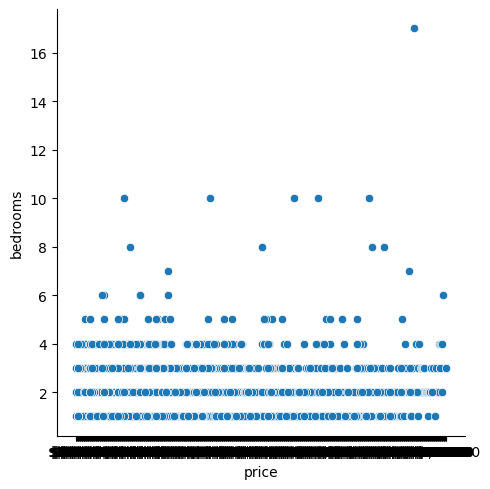

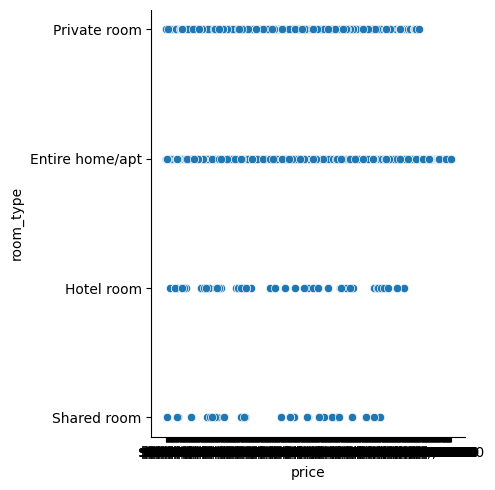

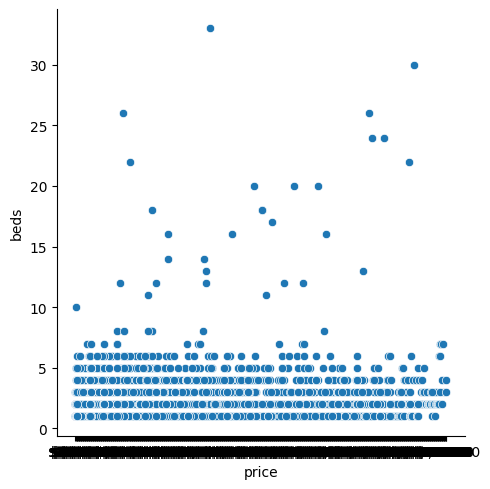

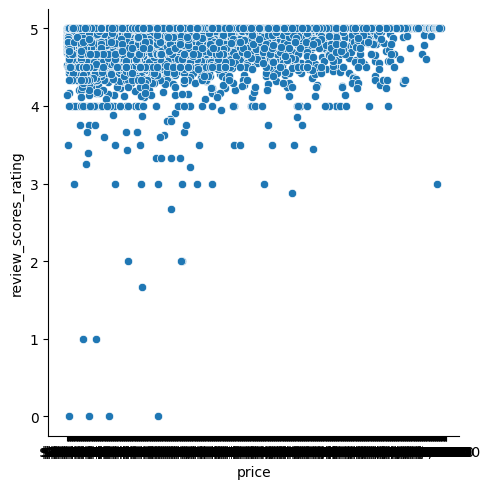

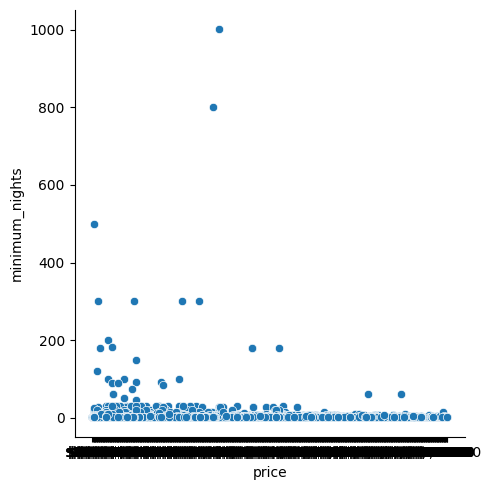

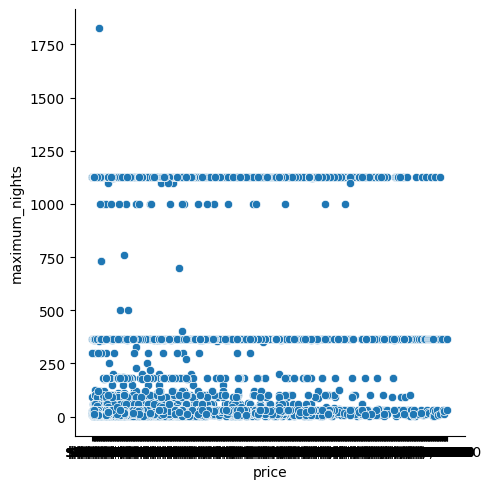

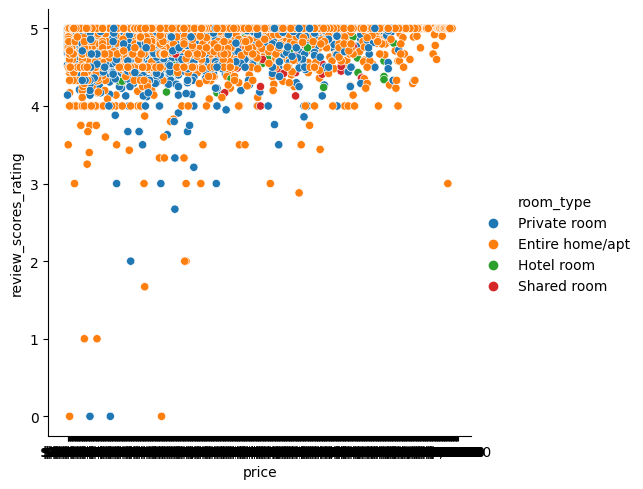

In [ ]:
#Lets check for some relationships between variables.
sns.relplot(x='price',y='bedrooms', data=new_data)


sns.relplot(x='price',y='room_type', data=new_data)

sns.relplot(x='price',y='beds', data=new_data)

sns.relplot(x='price',y='review_scores_rating', data=new_data)

sns.relplot(x='price',y='minimum_nights', data=new_data)

sns.relplot(x='price',y='maximum_nights', data=new_data)

sns.relplot(x='price',y='review_scores_rating',hue='room_type', data=new_data)

## Datan jalostaminen

Tässä vaiheessa muunnetaan dataa siten, että sitä voidaan myöhemmin hyödyntää analyysissä. Se mitä tässä vaiheessa tehdään riippuu datan laadusta ja siitä mihin käyttötarkoitukseen dataa tarvitaan. Eli tässä kohtaa on viisasta pohtia millaista analyysiä kyseisestä datasta halutaan toteuttaa. Tähän vaiheeseen voi kuulua esimerkiksi tietotyyppien muokkaaminen, turhien sarakkeiden poisto, tyhjien arvojen käsitteleminen ja muut toimenpiteet. Alla on esimerkki tästä vaiheesta, joka vastaa tämän käyttötarkoituksen tarpeita varsin hyvin. Yleisesti tämä vaihe on työläs ja suurin osa projektin ajasta kuluukin tähän.  

Tässä linkki erinomaiseen dokumenttiin: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [ ]:

# Luodaan luettelo sarakkeiden nimistä, jotka haluat säilyttää
cols_to_keep = ["price", "bedrooms", "beds", "review_scores_rating"]

# Luo uusi DataFrame, jossa on vain valitut sarakkeet
new_df = new_data.loc[:, cols_to_keep].copy()
new_df["price"] = new_df["price"].str.replace("$", "", regex=True).str.replace(",", "", regex=True).astype(float)
new_df.dropna(inplace=True)
# Tulosta uuden DataFramen ensimmäiset rivit varmistaaksesi, että se sisältää vain halutut sarakkeet
new_df.head()
new_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5988 entries, 0 to 6949
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 5988 non-null   float64
 1   bedrooms              5988 non-null   float64
 2   beds                  5988 non-null   float64
 3   review_scores_rating  5988 non-null   float64
dtypes: float64(4)
memory usage: 233.9 KB


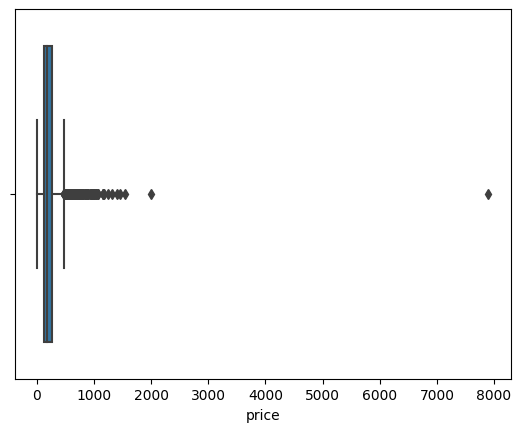

In [ ]:
sns.boxplot(x="price", data=new_df)
plt.show()

In [ ]:
# Tutkitaan datasta sitä, kuinka monessa asunnossa on 10 tai enemmän makuuhuoneita.

num_rows = len(new_df[new_df['bedrooms'] >= 10])
print("Number of rows with 10 or more bedrooms:", num_rows)


Number of rows with 10 or more bedrooms: 4


In [ ]:
# Rajataan pois asunnot joissa on 10 tai enemmän makuuhuoneita, koska ne ovat selkeitä poikkeamia datassa.

new_df = new_df[new_df['bedrooms'] < 10]

In [ ]:
# Etsitään yllä olevassa kuvassa esiintyvä outlieri
max_rows = new_df.nlargest(5, "price")
print(max_rows)

       price  bedrooms  beds  review_scores_rating
3807  7900.0       3.0   3.0                  4.89
2197  2000.0       3.0   3.0                  4.94
1659  1550.0       3.0   3.0                  4.91
2994  1450.0       5.0   5.0                  4.94
4788  1399.0       1.0   2.0                  4.67


In [ ]:
# Myös asunnon hinta 7900.0 on selkeä poikkeama, joka myös poistetaan.

max_index = new_df["price"].idxmax()

new_df = new_df.drop(max_index)


In [ ]:
num_rows = len(new_df[new_df['beds'] >= 20])
print("Number of rows with 10 or more beds:", num_rows)




Number of rows with 10 or more beds: 4


In [ ]:
# Poistetaan myös rivit joilla sänkyjä yli 20
new_df = new_df[new_df['beds'] < 20]

Yllä olevasta tulostuksesta näkee, että tietotyypit ovat jo valmiikis liukulukuja. Tämä helpottaa tilannetta, koska kategoristen muuttujien käsittely on oma lukunsa. Kategoristen sarakkeiden käsittelystä lisää myöhemmin.


## Datalähteet

Mielenkiintoisia datalähteitä on useita ja oikean valinta riippuu hyvin pitkälti siitä mitä lähdetään tutkimaan. Yksi tunnetuimmista lienee Kaggle(https://www.kaggle.com/). 
Tähän projektiin on data haettu täältä: http://data.insideairbnb.com. 

Tässä projektissa on käytetty Pandas kirjastoa datan hakemiseen suoraan url-osoitteesta. On olemassa myös useita muita vaihtoehtoja kuten CSV-moduulin, JSON-moduulin, Pickle-moduulin, XML-moduulin tai sqlite3-moduulin hyödyntäminen. Nämä toimivat silloin, kun data on jo tiedostomuodossa. On myös olemassa mielenkiintoinen tapa hakea dataa Pythoniin nimittäin raapija (scrapper). Tällä tekniikalla voidaan hakea dataa miltä vain nettisivulta. Tämä on mielenkiintoinen tapa, joka mahdollistaa luovan tavan hakea dataa paikoista mistä sitä ei ole muuten saatavilla. Tosin tässä projektissa keskitytään airbnb-dataan, johon löytyii parempikin vaihtoehto eli nettisivu, joka löytyy ylemmästä kappaleesta. 

Koneoppimisprojekteissa data esitetään usein taulukkomuodossa. Taulukon rivit vastaavat havaintoja tai taphtumia ja sarakkeet vastaavat piirteitä, joita havaintoihin kuuluu. Alla on yksinkertainen havainnollistava tulostus asiasta. 

DataFrame-tietorakennetta käytetään usein koneoppimisprojekteissa. Tässäkin projektissa käytetään Pandasin DataFrame-tietorakennetta datan tallentamiseen, esikäsittelemiseen ja alustavaan visualisoimiseen. 

In [ ]:
new_df.head()

,price,bedrooms,beds,review_scores_rating
0,69.0,1.0,2.0,4.89
1,325.0,1.0,1.0,4.76
2,244.0,1.0,2.0,4.75
3,244.0,1.0,6.0,4.94
4,220.0,4.0,4.0,4.88


Jos DataFrame halutaan tallentaa myöhempää käyttöä varten on olemassa tähän sopiva oiva keino nimittäin to_pickle(). Tämän avulla datan hallinta helpottuu. to_pickle() perustuu siihen, että se muuttaa DataFrame-olion Pythonin pickle mutoon binääritiedostona. Tämän jälkeen binääritiedosto voidaan tallentaa levulle ja ottaa myöhemmin käyttöön. 

In [ ]:
# Seuraavaksi testataan lineaarista regressiomallia hinnan ennustamiseen

Täältä löytyy sklearn-kirjaston dokumentaatio lisätietoa varten https://devdocs.io/scikit_learn/
Täältä löytyy matplotlib-kirjaston dokumentaatio lisätietoa varten https://matplotlib.org/

# Ohjattu oppiminen


Ohjattu oppiminen on alakategoria koneoppimiselle ja tekoälylle. Ohjaamattomalla oppimisella pyritään kouluttamaan koneoppimismalli siten, että se osaa ennustaa mahdollisimman tarkasti jotain tiettyä asiaa kuten hintaa uudesta datasetistä, jota se ei ole ennen nähnyt. 

Yksi yleisimmistä käyttökohteista lienee hinnan ennustaminen esimerkiksi asunnon sijainnin, pinta-alan, huoneiden lukumäärän, naapuruston ja muiden hintaan todennäköisesti vaikuttavien asioiden perusteella. 

Ohjattua oppimista käytetään myös kuvien tunnistuksessa, luonnollisen kielen käsittelyssä ja ennsutavassa analytiikassa. Alla on esimerkki ennustavasta analytiikasta, jossa tällä kertaa pyritään ennustamaan airbnb asuntojen hintoja makuuhuoneiden, sänkyjen ja aikaisempien arvostelujen perusteella.


Predictions:  [259.71985203 320.82222897 180.87843224 ... 178.08727097 138.20226817
 250.85033061]
Score:  0.1927902054438846


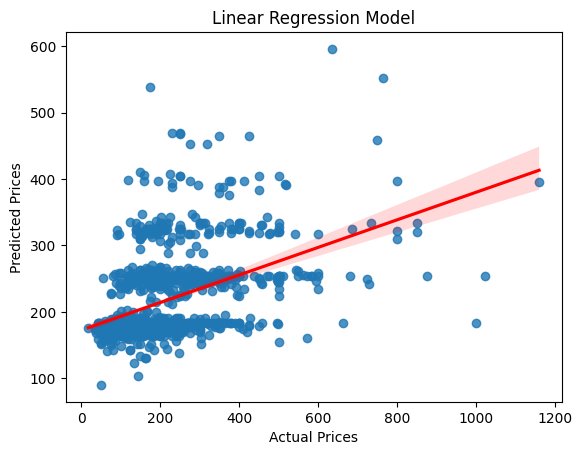

In [ ]:
# Jaetaan data testi- ja opetusaineistoihin.
train_data = new_df.drop(['price'], axis = 1)
test = new_df['price']

x_train, x_test, y_train, y_test = train_test_split(train_data, test, test_size = 0.2, random_state = 2)

# Lineaarisen regressioobjektin luominen ja sovittaminen harjoitusdataan
regr = LinearRegression()
regr.fit(x_train, y_train)

# Ennusteiden tekeminen testitietojen perusteella ja pistemäärän laskeminen
pred = regr.predict(x_test)
score = regr.score(x_test, y_test)


print("Predictions: ", pred)
print("Score: ", score)

# Luodaan hajontakuvaaja ennustetuista ja todellisista hinnoista
sns.regplot(x=y_test, y=pred, line_kws={'color': 'red'})

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Linear Regression Model")
plt.show()

Seuraavaksi arvioidaan mallin toimivuutta.Alla koodi jolla pyritään selvittämään kuinka hyvin malli toimii. Myös yksi erinomainen vaihtoehto olisi hakea uutta samanlaista dataa ja testata mallin toimivuutta siihen. Olisi oikeat vastaukset kyseiselle aineistolle.

In [ ]:
# Tutkitaan kohdemuuttujan vaihteluväli
price_range = new_df['price'].max() - new_df['price'].min()


print("Range of the target variable: ", price_range)

# Laske mallin keskimääräinen absoluuttinen virhe ja keskineliövirhe

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)


print("Mean Absolute Error (MAE): ", mae)
print("Mean Squared Error (MSE): ", mse)

pct_error = mae / price_range * 100

print("Percentage Error: ", pct_error, "%")



Range of the target variable:  1990.0
Mean Absolute Error (MAE):  83.9397917813147
Mean Squared Error (MSE):  13692.449697914464
Percentage Error:  4.218079989010789 %


In [ ]:
# Malli ei tietenkään ole täydellinen mutta näyttäisi toimivan tarpeeksi hyvin.

# Kategorisen datan käsittely

Tässä tapauksessa käsittelin jo valmiiksi numeerista dataa. Jos tilanne olisi toinen ja haluaisin analysoida kategorista dataa niin sitä pitäisi ensin muokata, jotta koneoppimisalgoritmit pystyvät sitä käsittelemää. Tähän on olemassa useita erilaisia tapoja, miten kategorista dataa voidaan muokata numeeriseksi. Tässä muutamia esimerkkejä:

Label encoder on hyvä tapa muuttaa kategorinen data numeeriseksi, jos kategorisella datalla on luontainen järjestys tai sijoitus: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html



One-hot encoder on hyvä tapa silloin kun kategorisilla datapisteillä ei ole luontaista järjestystä tai sijoitusta. Tämä metodi muuttaa jokaisen kategorisen sarakkeen binäärisarakkeeksi.  https:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

Myös pythonin pandas kirjastolla on oma one-hot encoder pd.get_dummies, joka pyrkii samaan lopputulokseen kuin sickit-learn kirjaston one hot encoder mutta sitä käytetään eri tapauksissa. Se kumpaa tulisi käyttää riippuu tapauksesta. https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

Alla vielä havainnollistava esimerkki pd.get_dummies function toimintalogiikasta. Varsinaisessa analyysissä se ei kuitenkaan ole tässä tapauksessa tarpeen, koska käsittelemme jo valmiiksi numeerista dataa.

In [ ]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6998 non-null   int64  
 1   listing_url                                   6998 non-null   object 
 2   scrape_id                                     6998 non-null   int64  
 3   last_scraped                                  6998 non-null   object 
 4   source                                        6998 non-null   object 
 5   name                                          6998 non-null   object 
 6   description                                   6992 non-null   object 
 7   neighborhood_overview                         4506 non-null   object 
 8   picture_url                                   6998 non-null   object 
 9   host_id                                       6998 non-null   i

In [ ]:
df_new_data_encoded = pd.get_dummies(df_copy)

# Print the encoded new_data DataFrame
print(df_new_data_encoded)

                      id       scrape_id    host_id  host_listings_count  \
0                   2818  20230309202119       3159                    1   
1                 311124  20230309202119    1600010                    1   
2                 319985  20230309202119    1640702                    2   
3                 327285  20230309202119    1672823                    3   
4                 331946  20230309202119    1687595                    1   
...                  ...             ...        ...                  ...   
6993  842462220391708128  20230309202119   47205615                    1   
6994  842493348876281257  20230309202119  454835217                    1   
6995  842634905680862660  20230309202119  504448710                    1   
6996  842713539293550316  20230309202119   17537276                    1   
6997  842754604161195632  20230309202119   20336096                    2   

      host_total_listings_count  neighbourhood_group_cleansed   latitude  \
0          

# Ohjaamaton oppiminen

Ohjaamaton oppiminen viittaa koneoppimislagoritmien käyttöön kuvioiden tunnistamisessa datamassasta. Dataa ei ole lokeroitu vaan algoritmin tehtävänä on löytää kuvioita ja rakenteellistaa dataa itse. Tunnetuimpia ohjaamattoman oppimisen koneoppimisalgoritmejä ovat:
1. K-means Clustering
2. Principal Component analysis
3. AutoEncoder
4. Deep Belief Networks
5. Restricted Boltzmann Machine
6. Hierarchial Temporary Memory
7. Convolutional Neural Networks
8. Suppoert Vector Machines
9. Market Basket Analysis
10. Social Network Analysis

Tässä muutamia linkkejä :
Ohjaamattoman oppimisen algoritmit yleisesti: https://medium.com/imagescv/top-8-most-important-unsupervised-machine-learning-algorithms-with-python-code-references-1222393b5077#:~:text=The%20K%2Dmeans%20clustering%20algorithm,is%20used%20for%20data%20segmentation.

Market Basket Analysis: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-market-basket-analysis/

Social Network Analysis: https://www.geeksforgeeks.org/types-of-social-networks-analysis/


Erilaisia algoritmejä on paljon ja niiden kaikkien opettelu ja osaaminen vie runsaasti aikaa. Tärkeintä on tunnistaa oma tilanne ja pohtia sen pohjalta, millainen ratkaisu sopii käsillä olevaan ongelmaan.

## Klusterointi eli ryvästäminen

Ryvästämisen tarkoituksena on jakaa datapisteet ryppäisiin, joiden ominaisuudet ovat lähellä toisiaan. Tavoitteena on siis valita ensiksi sopiva määrä ryppäitä mihin datapisteet halutaan jakaa. Siihen on olemassa monia keinoja mutta alla olevassa esimerkkikoodissa käytetään kyynärpää-metodia (elbow method). Tämän perusteella valitaan ryppäiden määrä, jota hyödynnetään itse k-means klusterointi-algoritmissä. 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

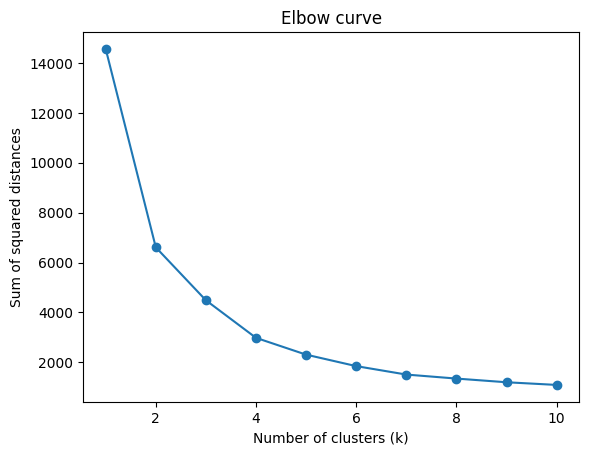

In [ ]:
# Kokeillaan Elbow-metodia klustereiden määrän selvittämiseksi.


inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(train_data)
    inertias.append(kmeans.inertia_)

# Visualisoidaan elbow-metodi
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow curve')
plt.show()


Yllä olevasta kuvaajasta nähdään, että silloin kun klustereiden lukumäärä on kaksi, kuvaajan jyrkkyys muuttuu eniten. Tällä perusteella valitsemme alla olevaan osuuteen klustereiden lukumääräksi kaksi. Voi kuitenkin käydä niin, että kuvaajasta ei selkeästi näe kohtaa missä muutos on suurinta. Silloin voi käyttää esimerkiksi silhouetti-pisteytystä. Tässä linkki kyseiseen väitteeseen: https://towardsdatascience.com/elbow-method-is-not-sufficient-to-find-best-k-in-k-means-clustering-fc820da0631d

In [ ]:


# Load your data and perform clustering using KMeans
X = train_data
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Compute the silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The average silhouette_score is : 0.6434272595283249


Tämän lisätarkastelun avulla voidaan todeta, että tulkitsimme kuvaajasta oikein ja oikea klustereiden määrä on kaksi, koska sillä tulee suurin arvo yllä olevasta koodin pätkästä. 

In [ ]:
feature_names = train_data.columns
print(feature_names)

Index(['bedrooms', 'beds', 'review_scores_rating'], dtype='object')


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


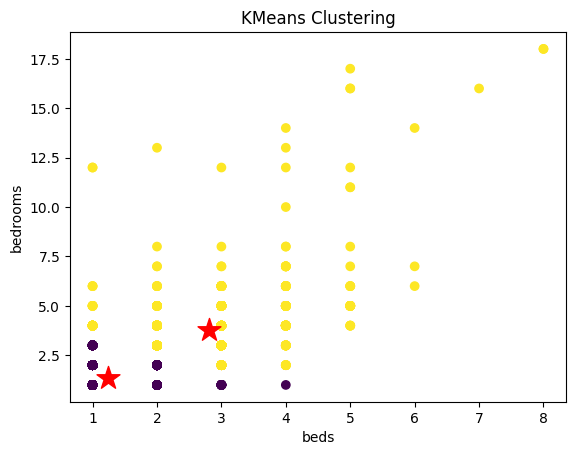

In [ ]:



kmeans = KMeans(n_clusters=2)


kmeans.fit(train_data)

labels = kmeans.labels_

# Klusterin sentroidien koordinaattien saaminen
centroids = kmeans.cluster_centers_

# Visualisoidaan klusterit ja datapisteet
plt.scatter(train_data.iloc[:, 0], train_data.iloc[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')

plt.xlabel('beds')
plt.ylabel('bedrooms')
plt.title('KMeans Clustering')
plt.show()


Yllä oleva visualisointi ei kuitenkaan aja asiaansa, koska tässä tapauksessa klusterointi perustuu kolmeen eri muuttujaan. Joten kokeillaan kolmiulotteista visualisointia.

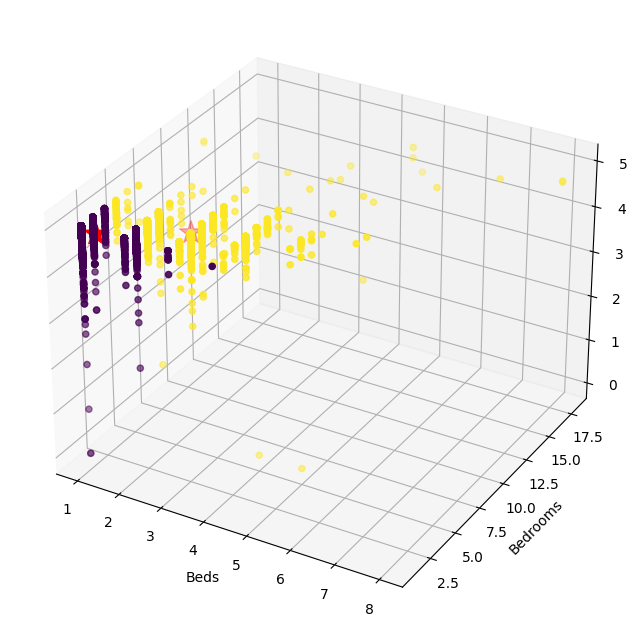

In [ ]:


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = train_data.iloc[:, 0]
y = train_data.iloc[:, 1]
z = train_data.iloc[:, 2]

ax.scatter(x, y, z, c=labels)
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='*', s=300, c='r')

ax.set_xlabel('Beds')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Review_scores_rating')

plt.show()


Yllä oleva visualisointi toimii jo vähän paremmin mutta se ei kuitenkaan ole interaktiivinen vaan stabiili. Kokeillaan seuraavaksi interaktiivista kolmiulotteista visualisointia.

In [ ]:


fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

x = train_data.iloc[:, 0]
y = train_data.iloc[:, 1]
z = train_data.iloc[:, 2]

fig.add_trace(
    go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=5, color=labels), name='Data'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2], mode='markers', 
                 marker=dict(size=10, color='red', symbol='diamond'), name='Centroids'),
    row=1, col=1
)

fig.update_layout(scene=dict(xaxis_title='bedrooms', yaxis_title='beds', zaxis_title='review_scores_rating'),
                  margin=dict(l=0, r=0, b=0, t=0))

fig.show()

In [ ]:


fig = px.scatter(train_data, x='bedrooms', y='beds', color=labels,
                 hover_data=['review_scores_rating'], title='K-Means Clustering')

fig.update_traces(marker=dict(size=8, opacity=0.8))

fig.update_layout(xaxis_title='bedrooms', yaxis_title='beds', 
                  legend_title='Cluster', width=800, height=600)

fig.show()


## Tekstidatan käsittely


Tekstin käsittely on tärkeä osa konenäköä (computer vision) ja luonnollisen kielen käsittelyä (NLP). Tekstin käsittely sisältää eri vaiheita kuten, tekstin esikäsittely, sanojen erottaminen eli tokenisointi sekä itse tekstidatan analysointi. Tässä alapuolella pienimuotoinen demo missä tavoitteena on tunnistaa tekstidatasta 10 käytetyintä sanaa. Tässä tapauksessa olemme kiinnostuneita airbnb-asunnon ilmoituksen kuvauksesta eli description-sarakkeesta.

In [ ]:

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:


stop_words = set(stopwords.words('english'))
sana = df['description'].dropna()
all_words_kuvaus = ' '.join(sana)
tokens = word_tokenize(all_words_kuvaus)
tokens = [token for token in tokens if token.isalnum()]
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
word_counts = Counter(filtered_tokens)
most_common_words = word_counts.most_common(10)

exclude = set(['br', 'b'])



In [ ]:
print("10 yleisintä sanaa:")
for word, count in most_common_words:
    if word.lower() not in exclude:
      print(f"{word}: {count}")

10 yleisintä sanaa:
apartment: 8070
Amsterdam: 7451
space: 6234
room: 5518
kitchen: 4201
number: 3755
house: 3708
License: 3700


# Visuaalinen analytiikka

Datan visualisointi on ylensä mielletty loppuvaiheeksi datatiedeprojektia mutta on myös tärkeää visualisoida dataa pitkin prosessia, jotta saa paremman ymmärryksen sen luonteesta ja ominaisuuksista. Tässä projektissa visualisointia käytetään kommunikoinnin työvälineenä pitkin projektia. Alla kuitenkin vielä esimerkki visualisoinnista nimittäin sanapilvi. 

Visualisoinnin 12 sääntöä: https://medium.com/estiem/the-12-rules-of-data-visualization-79994abb74aa

Kuinka visualisoida dataa: https://databox.com/how-to-visualize-data


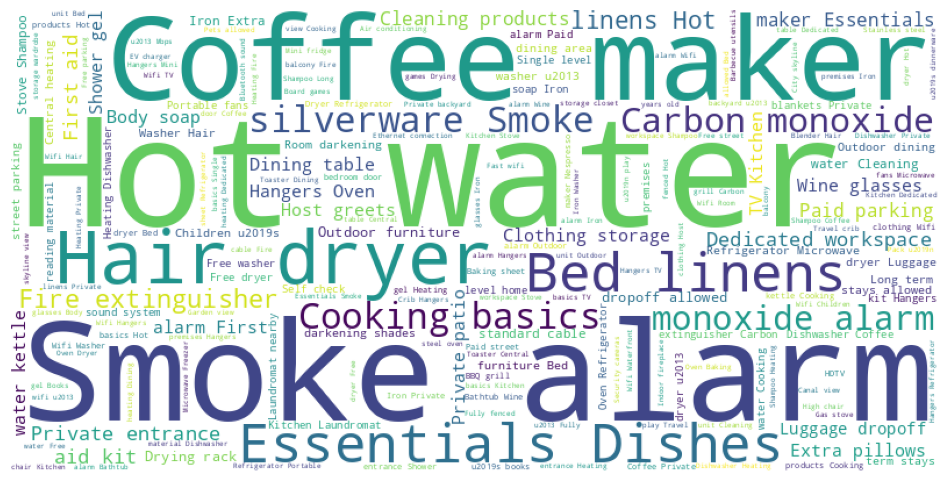

In [ ]:
# import the required libraries


# concatenate all the amenities into a single string
amenities_text = " ".join(list(df['amenities'].values))

# generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(amenities_text)

# plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Yhteenveto

Tässä datatiedeprojektissa painottui oma oppiminen ja asioihin tutustuminen. Tämä kuitenkin toimii hyvänä pohjana tuleville datatiedeprojekteille. Idea tässä projektissa oli reflektoida omaa oppimista ja kokeilla erilaisia menetelmiä valittuun datasettiin. 

Projektin kulku oli varsin iteraviitinen prosessi. Esimerkiksi ryvästämisessä ryppäiden lukumäärä vaihtui kolmesta kahteen, sen jälkeen kun datasettiä rajattiin ja poikkeamat poistettiin. 